In [16]:
import re
import pandas as pd
import numpy as np
import math
import collections # 词频统计库
from keras.models import Sequential 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [9]:
#读取数据
with open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\wordLib3.txt","r",encoding='utf-8') as f:
    file = f.read()
word_all = file.split()
with open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\review3.txt","r",encoding='utf-8') as F:
    review = F.readlines()
f.close()
F.close()

data = pd.read_csv('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\IMDB Dataset.csv')
Y = data["sentiment"]
Y = np.array(Y)
Y = Y.tolist()
for i in range(len(Y)):
    if Y[i] == 'positive':
        Y[i] = 1
    else:
        Y[i] = 0

In [3]:
#计算TF
def TF(corpus,word_all):
    weight_tf = [[] for i in corpus]
    for word in word_all:
        for i in range(len(corpus)):
            temp_list = corpus[i].split()
            n1 = temp_list.count(word)
            n2 = len(temp_list)
            tf = n1/n2
            weight_tf[i].append(tf)
    return weight_tf

 #计算精度、查准率P、查全率R、

def cal_acc(pred,y_test):
    acc = 0;
    for i in range(len(pred)):
        acc += abs(pred[i]-y_test[i])
    acc /= len(pred)
    acc = 1-acc
    return acc

def cal_TP_FN_FP_TN(pred,y_test):
    TP = 0 
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(pred)):
        if(pred[i] == 1 and y_test[i] == 1):
            TP += 1
        if(pred[i] == 1 and y_test[i] == 0):
            FP += 1
        if(pred[i] == 0 and y_test[i] == 0):
            TN += 1
        if(pred[i] == 0 and y_test[i] == 1):
            FN += 1
    return TP,FN,FP,TN

def cal_P(TP,FP):
    P = TP/(TP+FP)
    return P

def cal_R(TP,FN):
    R = TP / (TP+FN)
    return R

In [ ]:
#tf = TF(review,word_all)

In [ ]:
#将tf写入txt文件
f=open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tf3.txt","w",encoding='utf-8')
for vec in tf:
    for num in vec:
        f.write(str(num) + ' ')
    f.write('\n')
f.close()

In [4]:
#从文件中读tf
f=open("C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tf3.txt","r",encoding='utf-8')
TF = f.readlines()
f.close()
tf = [[]for i in range(len(TF))]
for i in range(len(TF)):
    for num in TF[i].split():
        tf[i].append(float(num))

In [10]:
tf_train = tf[0:30000]
tf_valid = tf[30000:40000]
tf_test = tf[40000:]
y_train = Y[0:30000]
y_valid = Y[30000:40000]
y_test = Y[40000:]

In [51]:
print(len(tf_train))
print(len(tf_train[0]))
print(type(y_train))

30000
2659
<class 'list'>


In [45]:
model = Sequential()
#model.add(Embedding(2659, 64, input_length = 20000))
model.add(Conv1D(filters = 64, kernel_size = 3,input_shape=(2659, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
#model.add(Conv1D(filters = 128, kernel_size = 3, padding = 'same',activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(125, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 2659, 64)          256       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1329, 64)         0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 1329, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 85056)             0         
                                                                 
 dense_17 (Dense)            (None, 64)                5443648   
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                      

In [46]:
# 训练
history = model.fit(tf_train, y_train, epochs=8, batch_size=128,
                    verbose=1, validation_data=[tf_valid, y_valid])
model_file = 'C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tf_model.h5'
model.save(model_file)

Epoch 1/8
235/235 [==============================] - 115s 490ms/step - loss: 0.5222 - accuracy: 0.7468 - val_loss: 0.3868 - val_accuracy: 0.8365
Epoch 2/8
235/235 [==============================] - 58s 249ms/step - loss: 0.3584 - accuracy: 0.8472 - val_loss: 0.3452 - val_accuracy: 0.8533
Epoch 3/8
235/235 [==============================] - 58s 248ms/step - loss: 0.3297 - accuracy: 0.8602 - val_loss: 0.3342 - val_accuracy: 0.8593
Epoch 4/8
235/235 [==============================] - 59s 251ms/step - loss: 0.3179 - accuracy: 0.8674 - val_loss: 0.3289 - val_accuracy: 0.8598
Epoch 5/8
235/235 [==============================] - 59s 250ms/step - loss: 0.3049 - accuracy: 0.8733 - val_loss: 0.3261 - val_accuracy: 0.8636
Epoch 6/8
235/235 [==============================] - 58s 247ms/step - loss: 0.2983 - accuracy: 0.8753 - val_loss: 0.3275 - val_accuracy: 0.8647
Epoch 7/8
235/235 [==============================] - 58s 249ms/step - loss: 0.2879 - accuracy: 0.8768 - val_loss: 0.3229 - val_accuracy

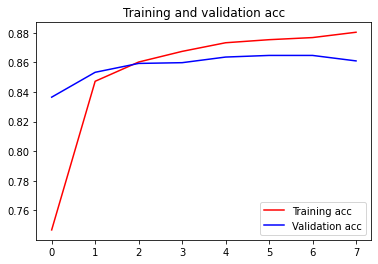

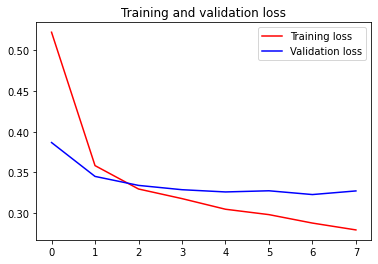

In [47]:
plt.figure()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs,acc,'r',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.savefig('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tf_acc8.png')
plt.show()

plt.plot(epochs,loss,'r',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('C:\\Users\\azhi\\Desktop\\作业\\自然语言处理\\tf_loss8.png')
plt.show()

In [48]:
tf_pred = model.predict(tf_test)

In [49]:
for i in range(len(tf_pred)):
    if(tf_pred[i] > 0.5):
        tf_pred[i] = 1
    else:
        tf_pred[i] = 0

acc = cal_acc(tf_pred,y_test)
TP, FN, FP, TN = cal_TP_FN_FP_TN(tf_pred,y_test)
P = cal_P(TP,FP)
R = cal_R(TP,FN)
print("acc is "+str(acc[0]))
print("P is "+str(P))
print("R is "+str(R))

acc is 0.86
P is 0.840604343720491
R is 0.8889554623527062
